In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"


In [2]:
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
feature_names = column_names[:-1]
label_name = column_names[-1]

In [7]:
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [10]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.8, 5.4, 4.8, 5.2, 4.4, 5.8, 5.5, 4.6, 6.5, 5.5, 4.9, 6.2, 5. ,
       5.5, 7.2, 5.1, 5.4, 6.6, 5.9, 6.7, 5.6, 4.9, 7.7, 6.3, 6.9, 6.7,
       5.1, 5.6, 7.2, 6.1, 4.8, 6.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3.9, 3. , 3.4, 3. , 2.7, 2.4, 3.2, 2.8, 3.5, 3.1, 2.2, 3. ,
       2.4, 3.2, 3.5, 3. , 3. , 3. , 3.1, 2.5, 3.1, 2.8, 3.4, 3.1, 3. ,
       2.5, 2.9, 3.6, 2.8, 3.4, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.4, 1.7, 1.4, 1.4, 1.3, 5.1, 3.7, 1.4, 4.6, 1.3, 1.5, 4.5, 1.6,
       3.8, 6. , 1.4, 4.5, 4.4, 5.1, 5.6, 3.9, 1.5, 6.7, 5.6, 4.9, 5.2,
       3. , 3.6, 6.1, 4. , 1.6, 5.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.3, 0.4, 0.1, 0.2, 0.2, 1.9, 1. , 0.2, 1.5, 0.2, 0.1, 1.5, 0.2,
       1.1, 1.8, 0.3, 1.5, 1.4, 1.8, 2.4, 1.1, 0.1, 2. , 2.4,

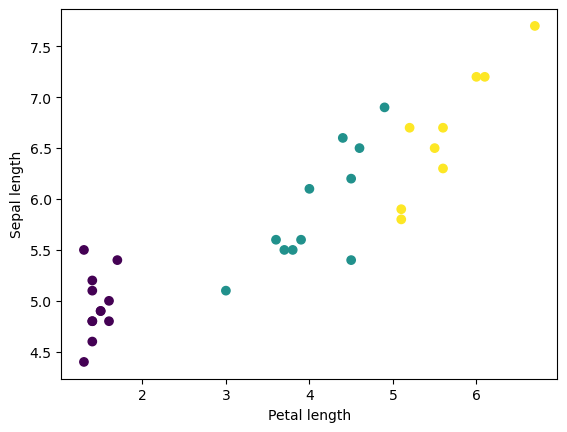

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [13]:
train_dataset = train_dataset.map(pack_features_vector)

In [14]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.6 3.  4.4 1.4]
 [5.1 3.5 1.4 0.3]
 [7.  3.2 4.7 1.4]
 [5.2 3.4 1.4 0.2]
 [6.  2.9 4.5 1.5]], shape=(5, 4), dtype=float32)


In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [16]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[5.0496063 , 3.5144095 , 0.5127251 ],
       [3.8085468 , 2.580575  , 0.41829205],
       [5.4049077 , 3.7565475 , 0.54952466],
       [3.8666935 , 2.6199958 , 0.42463   ],
       [4.796676  , 3.4018416 , 0.48555624]], dtype=float32)>

In [17]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.8155808 , 0.17568696, 0.00873221],
       [0.7538146 , 0.22078174, 0.02540362],
       [0.8332282 , 0.160284  , 0.00648781],
       [0.75789094, 0.21785764, 0.02425144],
       [0.79283744, 0.19652383, 0.0106387 ]], dtype=float32)>

In [18]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 0 1 0 1 2 0 0 0 0 0 0 2 0 1 1 0 0 2 2 0 0 2 2 1 0 0 0 2 0 0 2]


In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.7026543617248535


In [21]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.7026543617248535
Step: 1,         Loss: 1.6077419519424438


In [24]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.930, Accuracy: 35.000%
Epoch 050: Loss: 1.024, Accuracy: 70.000%
Epoch 100: Loss: 0.572, Accuracy: 70.833%
Epoch 150: Loss: 0.320, Accuracy: 95.833%
Epoch 200: Loss: 0.194, Accuracy: 97.500%


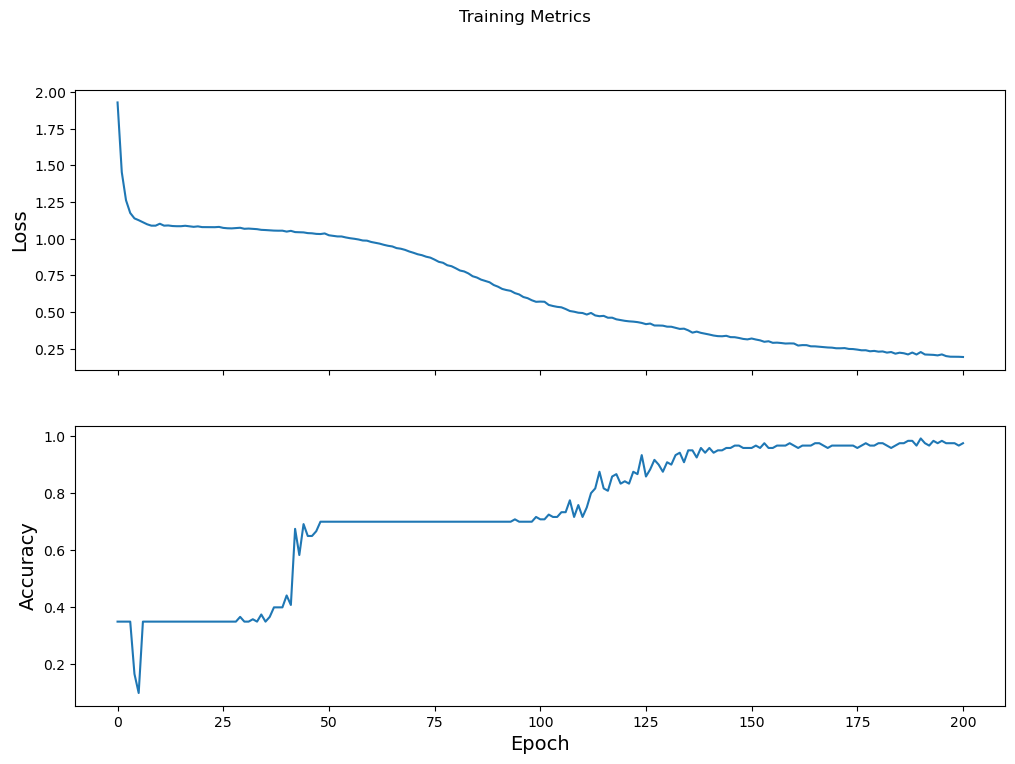

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [26]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [27]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [29]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [30]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (94.9%)
Example 1 prediction: Iris versicolor (77.5%)
Example 2 prediction: Iris virginica (70.3%)
